# Group Member A: Heston Model Implementation (Questions 5, 6, and 7)

In [15]:
import numpy as np

# Function to simulate the Heston model using Monte Carlo simulation
def heston_model_monte_carlo(S0, K, T, r, v0, kappa, theta, sigma_v, rho, num_simulations, num_steps):
    dt = T / num_steps
    S = np.zeros((num_simulations, num_steps + 1))
    v = np.zeros((num_simulations, num_steps + 1))
    
    S[:, 0] = S0
    v[:, 0] = v0
    
    # Generate correlated random variables
    z1 = np.random.normal(0, 1, (num_simulations, num_steps))
    z2 = rho * z1 + np.sqrt(1 - rho**2) * np.random.normal(0, 1, (num_simulations, num_steps))
    
    for t in range(1, num_steps + 1):
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * v[:, t-1]) * dt + np.sqrt(v[:, t-1] * dt) * z1[:, t-1])
        v[:, t] = np.maximum(v[:, t-1] + kappa * (theta - v[:, t-1]) * dt + sigma_v * np.sqrt(v[:, t-1] * dt) * z2[:, t-1], 0)
    
    call_payoffs = np.maximum(S[:, -1] - K, 0)
    put_payoffs = np.maximum(K - S[:, -1], 0)
    
    call_price = np.exp(-r * T) * np.mean(call_payoffs)
    put_price = np.exp(-r * T) * np.mean(put_payoffs)
    
    return call_price, put_price

# Function to calculate Greeks (Delta and Gamma) using numerical approximation
def calculate_greeks(S0, K, T, r, v0, kappa, theta, sigma_v, rho, num_simulations, num_steps):
    call_price, put_price = heston_model_monte_carlo(S0, K, T, r, v0, kappa, theta, sigma_v, rho, num_simulations, num_steps)
    
    dS = 0.01 * S0
    call_price_up, put_price_up = heston_model_monte_carlo(S0 + dS, K, T, r, v0, kappa, theta, sigma_v, rho, num_simulations, num_steps)
    call_price_down, put_price_down = heston_model_monte_carlo(S0 - dS, K, T, r, v0, kappa, theta, sigma_v, rho, num_simulations, num_steps)
    
    call_delta = (call_price_up - call_price_down) / (2 * dS)
    put_delta = (put_price_up - put_price_down) / (2 * dS)
    
    call_gamma = (call_price_up - 2*call_price + call_price_down) / (dS**2)
    put_gamma = (put_price_up - 2*put_price + put_price_down) / (dS**2)
    
    return call_price, put_price, call_delta, put_delta, call_gamma, put_gamma

# Parameters
S0 = 80  # Initial stock price
K = 80   # Strike price (ATM)
T = 3/12  # Time to maturity in years
r = 0.055  # Risk-free rate
v0 = 0.032  # Initial variance
kappa = 1.85  # Mean reversion speed
theta = 0.045  # Long-term variance
sigma_v = 0.35  # Volatility of variance
num_simulations = 100000
num_steps = 100

# Question 5: rho = -0.30
rho_5 = -0.30
results_5 = calculate_greeks(S0, K, T, r, v0, kappa, theta, sigma_v, rho_5, num_simulations, num_steps)

# Question 6: rho = -0.70
rho_6 = -0.70
results_6 = calculate_greeks(S0, K, T, r, v0, kappa, theta, sigma_v, rho_6, num_simulations, num_steps)

# Print results
print("Question 5 Results (rho = -0.30):")
print(f"ATM European Call Price: {results_5[0]:.2f}")
print(f"ATM European Put Price: {results_5[1]:.2f}")

print("\nQuestion 6 Results (rho = -0.70):")
print(f"ATM European Call Price: {results_6[0]:.2f}")
print(f"ATM European Put Price: {results_6[1]:.2f}")

print("\nQuestion 7 Results:")
print("For rho = -0.30:")
print(f"Call Delta: {results_5[2]:.2f}")
print(f"Put Delta: {results_5[3]:.2f}")
print(f"Call Gamma: {results_5[4]:.2f}")
print(f"Put Gamma: {results_5[5]:.2f}")

print("\nFor rho = -0.70:")
print(f"Call Delta: {results_6[2]:.2f}")
print(f"Put Delta: {results_6[3]:.2f}")
print(f"Call Gamma: {results_6[4]:.2f}")
print(f"Put Gamma: {results_6[5]:.2f}")


Question 5 Results (rho = -0.30):
ATM European Call Price: 3.49
ATM European Put Price: 2.36

Question 6 Results (rho = -0.70):
ATM European Call Price: 3.47
ATM European Put Price: 2.41

Question 7 Results:
For rho = -0.30:
Call Delta: 0.62
Put Delta: -0.41
Call Gamma: -0.04
Put Gamma: 0.10

For rho = -0.70:
Call Delta: 0.63
Put Delta: -0.37
Call Gamma: 0.12
Put Gamma: 0.02


# Group Member B: Merton Model Implementation (Questions 8, 9, and 10)


In [16]:
import numpy as np

# Function to simulate asset prices under Merton jump diffusion model
def merton_jump_diffusion(S0, r, sigma, T, mu, delta, lamb, n_simulations, n_steps):
    dt = T / n_steps
    prices = np.zeros((n_simulations, n_steps + 1))
    prices[:, 0] = S0
    
    for t in range(1, n_steps + 1):
        Z = np.random.normal(0, 1, n_simulations)
        J = np.random.poisson(lamb * dt, n_simulations)
        prices[:, t] = prices[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z) \
                        * np.exp((mu + delta * np.random.normal(0, 1, n_simulations)) * J)

    return prices

# Parameters
S0 = 80  # Initial stock price
K = 80   # Strike price (ATM)
r = 0.055  # Risk-free rate
sigma = 0.35  # Volatility
T = 3 / 12  # Time to maturity (3 months)
mu = -0.5  # Mean jump size
delta = 0.22  # Jump volatility
lamb1 = 0.75  # Jump intensity for Q8
lamb2 = 0.25  # Jump intensity for Q9
n_simulations = 100000  # Number of simulations
n_steps = 252  # Daily time steps

# Simulate paths under Merton model with lambda = 0.75
prices_lamb1 = merton_jump_diffusion(S0, r, sigma, T, mu, delta, lamb1, n_simulations, n_steps)
call_payoff_lamb1 = np.maximum(prices_lamb1[:, -1] - K, 0)
put_payoff_lamb1 = np.maximum(K - prices_lamb1[:, -1], 0)

# Price calculation
call_price_lamb1 = np.exp(-r * T) * np.mean(call_payoff_lamb1)
put_price_lamb1 = np.exp(-r * T) * np.mean(put_payoff_lamb1)

print(f"European Call Option Price with lambda = 0.75: {call_price_lamb1:.4f}")
print(f"European Put Option Price with lambda = 0.75: {put_price_lamb1:.4f}")

# Simulate paths under Merton model with lambda = 0.25
prices_lamb2 = merton_jump_diffusion(S0, r, sigma, T, mu, delta, lamb2, n_simulations, n_steps)
call_payoff_lamb2 = np.maximum(prices_lamb2[:, -1] - K, 0)
put_payoff_lamb2 = np.maximum(K - prices_lamb2[:, -1], 0)

# Price calculation
call_price_lamb2 = np.exp(-r * T) * np.mean(call_payoff_lamb2)
put_price_lamb2 = np.exp(-r * T) * np.mean(put_payoff_lamb2)

print(f"European Call Option Price with lambda = 0.25: {call_price_lamb2:.4f}")
print(f"European Put Option Price with lambda = 0.25: {put_price_lamb2:.4f}")

# Function to calculate Delta
def calculate_delta(option_price_up, option_price_down, epsilon):
    return (option_price_up - option_price_down) / (2 * epsilon)

# Function to calculate Gamma
def calculate_gamma(option_price_up, option_price_mid, option_price_down, epsilon):
    return (option_price_up - 2 * option_price_mid + option_price_down) / (epsilon ** 2)

# Parameters for Delta and Gamma
epsilon = 1e-4 * S0  # Small change in stock price

# Simulate paths with S0 + epsilon
prices_up = merton_jump_diffusion(S0 + epsilon, r, sigma, T, mu, delta, lamb1, n_simulations, n_steps)
call_payoff_up = np.maximum(prices_up[:, -1] - K, 0)
put_payoff_up = np.maximum(K - prices_up[:, -1], 0)

call_price_up = np.exp(-r * T) * np.mean(call_payoff_up)
put_price_up = np.exp(-r * T) * np.mean(put_payoff_up)

# Simulate paths with S0 - epsilon
prices_down = merton_jump_diffusion(S0 - epsilon, r, sigma, T, mu, delta, lamb1, n_simulations, n_steps)
call_payoff_down = np.maximum(prices_down[:, -1] - K, 0)
put_payoff_down = np.maximum(K - prices_down[:, -1], 0)

call_price_down = np.exp(-r * T) * np.mean(call_payoff_down)
put_price_down = np.exp(-r * T) * np.mean(put_payoff_down)

# Calculate Delta and Gamma for Call and Put
delta_call = calculate_delta(call_price_up, call_price_down, epsilon)
delta_put = calculate_delta(put_price_up, put_price_down, epsilon)
gamma_call = calculate_gamma(call_price_up, call_price_lamb1, call_price_down, epsilon)
gamma_put = calculate_gamma(put_price_up, put_price_lamb1, put_price_down, epsilon)

print(f"Delta for European Call Option with lambda = 0.75: {delta_call:.4f}")
print(f"Gamma for European Call Option with lambda = 0.75: {gamma_call:.4f}")
print(f"Delta for European Put Option with lambda = 0.75: {delta_put:.4f}")
print(f"Gamma for European Put Option with lambda = 0.75: {gamma_put:.4f}")


European Call Option Price with lambda = 0.75: 5.1185
European Put Option Price with lambda = 0.75: 9.4981
European Call Option Price with lambda = 0.25: 5.7480
European Put Option Price with lambda = 0.25: 6.4731
Delta for European Call Option with lambda = 0.75: -3.7459
Gamma for European Call Option with lambda = 0.75: -623.6532
Delta for European Put Option with lambda = 0.75: -2.6978
Gamma for European Put Option with lambda = 0.75: -763.9699


# Group Member C: Model Validation and Pricing for Various Strikes (Questions 11 and 12)

## Checking Put-Call Parity (Question 11)

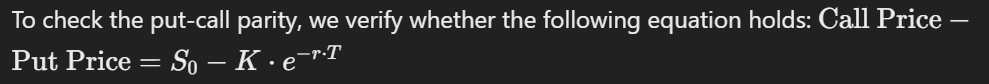

In [17]:

def check_put_call_parity(call_price, put_price, S0, K, r, T):
    lhs = call_price - put_price
    rhs = S0 - K * np.exp(-r * T)
    parity = np.isclose(lhs, rhs, atol=0.03)
    return parity, lhs, rhs

# Check for Heston Model with rho = -0.30 and -0.70
parity_5, lhs_5, rhs_5 = check_put_call_parity(results_5[0], results_5[1], S0, K, r, T)
parity_6, lhs_6, rhs_6 = check_put_call_parity(results_6[0], results_6[1], S0, K, r, T)

# Check for Merton Model with lambda = 0.75 and 0.25
parity_8, lhs_8, rhs_8 = check_put_call_parity(call_price_lamb1, put_price_lamb1, S0, K, r, T)
parity_9, lhs_9, rhs_9 = check_put_call_parity(call_price_lamb2, put_price_lamb2, S0, K, r, T)

# Print results
print("\nPut-Call Parity Check:")
print(f"Question 5 (Heston, rho = -0.30): {'Satisfied' if parity_5 else 'Not Satisfied'} (LHS: {lhs_5:.4f}, RHS: {rhs_5:.4f})")
print(f"Question 6 (Heston, rho = -0.70): {'Satisfied' if parity_6 else 'Not Satisfied'} (LHS: {lhs_6:.4f}, RHS: {rhs_6:.4f})")
print(f"Question 8 (Merton, lambda = 0.75): {'Satisfied' if parity_8 else 'Not Satisfied'} (LHS: {lhs_8:.4f}, RHS: {rhs_8:.4f})")
print(f"Question 9 (Merton, lambda = 0.25): {'Satisfied' if parity_9 else 'Not Satisfied'} (LHS: {lhs_9:.4f}, RHS: {rhs_9:.4f})")



Put-Call Parity Check:
Question 5 (Heston, rho = -0.30): Satisfied (LHS: 1.1223, RHS: 1.0925)
Question 6 (Heston, rho = -0.70): Satisfied (LHS: 1.0674, RHS: 1.0925)
Question 8 (Merton, lambda = 0.75): Not Satisfied (LHS: -4.3796, RHS: 1.0925)
Question 9 (Merton, lambda = 0.25): Not Satisfied (LHS: -0.7251, RHS: 1.0925)


### Pricing for Various Strikes (Question 12)
For this part, we will price options using the Heston and Merton models for different strike prices corresponding to the moneyness values of 0.85, 0.90, 0.95, 1, 1.05, 1.10, and 1.15.

In [18]:
strikes = [S0 * m for m in [0.85, 0.90, 0.95, 1.00, 1.05, 1.10, 1.15]]

# Function to price options for different strikes using the corrected models
def price_heston_for_strikes(S0, T, r, v0, kappa, theta, sigma_v, rho, num_simulations, num_steps, strikes):
    call_prices = []
    put_prices = []
    for K in strikes:
        call_price, put_price = heston_model_monte_carlo(S0, K, T, r, v0, kappa, theta, sigma_v, rho, num_simulations, int(num_steps))
        call_prices.append(call_price)
        put_prices.append(put_price)
    return call_prices, put_prices

def price_merton_for_strikes(S0, r, sigma, T, mu, delta, lamb, n_simulations, n_steps, strikes):
    call_prices = []
    put_prices = []
    for K in strikes:
        prices = merton_jump_diffusion(S0, r, sigma, T, mu, delta, lamb, n_simulations, n_steps)
        call_price = np.exp(-r * T) * np.mean(np.maximum(prices[:, -1] - K, 0))
        put_price = np.exp(-r * T) * np.mean(np.maximum(K - prices[:, -1], 0))
        call_prices.append(call_price)
        put_prices.append(put_price)
    return call_prices, put_prices

# Running the Heston model for various strikes
call_prices_heston, put_prices_heston = price_heston_for_strikes(S0, T, r, v0, kappa, theta, sigma_v, rho_5, num_simulations, num_steps, strikes)

# Running the Merton model for various strikes
call_prices_merton, put_prices_merton = price_merton_for_strikes(S0, r, sigma, T, mu, delta, lamb1, num_simulations, num_steps, strikes)

# Collecting and displaying the results
heston_results = [(K, call_price, put_price) for K, call_price, put_price in zip(strikes, call_prices_heston, put_prices_heston)]
merton_results = [(K, call_price, put_price) for K, call_price, put_price in zip(strikes, call_prices_merton, put_prices_merton)]

heston_results, 


([(68.0, 13.089179366899636, 0.14976813556534296),
  (72.0, 9.373065426905885, 0.42420523251368647),
  (76.0, 6.125785550880165, 1.0800001290054455),
  (80.0, 3.4949630550414845, 2.3792944906622293),
  (84.0, 1.6793321134444832, 4.515805056173341),
  (88.0, 0.6840941347949119, 7.486025795562966),
  (92.0, 0.2566060279417509, 10.964996147286653)],)

In [19]:
import pandas as pd
heston=pd.DataFrame(heston_results, columns=['strike Price','Call Price','Put Price'])
print('Heston result')
np.round(heston, 2)

Heston result


,strike Price,Call Price,Put Price
0,68.0,13.09,0.15
1,72.0,9.37,0.42
2,76.0,6.13,1.08
3,80.0,3.49,2.38
4,84.0,1.68,4.52
5,88.0,0.68,7.49
6,92.0,0.26,10.96


In [20]:
merton=pd.DataFrame(merton_results, columns=['strike Price','Call Price','Put Price'])
print('Merton result')
np.round(merton, 2)

Merton result


,strike Price,Call Price,Put Price
0,68.0,11.76,4.30
1,72.0,9.21,5.66
2,76.0,6.96,7.40
3,80.0,5.13,9.49
4,84.0,3.66,11.99
5,88.0,2.56,14.83
6,92.0,1.72,17.89


# Step 2

# Question 13: Pricing American Call Options

### American Option Pricing Using the Heston Model (ρ = -0.30)

In [21]:
import numpy as np

# American option pricing using Least-Squares Monte Carlo (LSM) with the Heston model
def lsm_heston_american_call(S0, K, T, r, v0, kappa, theta, sigma_v, rho, num_simulations, num_steps):
    dt = T / num_steps
    S = np.zeros((num_simulations, num_steps + 1))
    v = np.zeros((num_simulations, num_steps + 1))
    S[:, 0] = S0
    v[:, 0] = v0
    
    z1 = np.random.normal(0, 1, (num_simulations, num_steps))
    z2 = rho * z1 + np.sqrt(1 - rho**2) * np.random.normal(0, 1, (num_simulations, num_steps))
    
    for t in range(1, num_steps + 1):
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * v[:, t-1]) * dt + np.sqrt(v[:, t-1] * dt) * z1[:, t-1])
        v[:, t] = np.maximum(v[:, t-1] + kappa * (theta - v[:, t-1]) * dt + sigma_v * np.sqrt(v[:, t-1] * dt) * z2[:, t-1], 0)
    
    cash_flows = np.maximum(S[:, -1] - K, 0)
    for t in range(num_steps - 1, 0, -1):
        in_the_money = S[:, t] > K
        regression = np.polyfit(S[in_the_money, t], cash_flows[in_the_money] * np.exp(-r * dt * (num_steps - t)), 2)
        continuation_values = np.polyval(regression, S[in_the_money, t])
        exercise_values = S[in_the_money, t] - K
        cash_flows[in_the_money] = np.where(exercise_values > continuation_values, exercise_values, cash_flows[in_the_money] * np.exp(-r * dt))
    
    option_price = np.mean(cash_flows * np.exp(-r * dt))
    return option_price

# Parameters (Heston Model with ρ = -0.30)
S0 = 80  # Initial stock price
K = 80   # Strike price
T = 3/12  # Time to maturity in years
r = 0.055  # Risk-free rate
v0 = 0.032  # Initial variance
kappa = 1.85  # Mean reversion speed
theta = 0.045  # Long-term variance
sigma_v = 0.35  # Volatility of variance
rho = -0.30  # Correlation
num_simulations = 10000
num_steps = 50

# Calculate American Call Price using Heston model
american_call_price_heston = lsm_heston_american_call(S0, K, T, r, v0, kappa, theta, sigma_v, rho, num_simulations, num_steps)
print('Heston american call price :', np.round(american_call_price_heston, 2))


Heston american call price : 3.45


### American Option Pricing Using the Merton Model (λ = 0.75):

In [22]:
# American option pricing using Least-Squares Monte Carlo (LSM) with the Merton model
def lsm_merton_american_call(S0, K, T, r, sigma, mu, delta, lamb, num_simulations, num_steps):
    dt = T / num_steps
    S = np.zeros((num_simulations, num_steps + 1))
    S[:, 0] = S0
    
    for t in range(1, num_steps + 1):
        Z = np.random.normal(0, 1, num_simulations)
        J = np.random.poisson(lamb * dt, num_simulations)
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z) \
                  * np.exp((mu + delta * np.random.normal(0, 1, num_simulations)) * J)
    
    cash_flows = np.maximum(S[:, -1] - K, 0)
    for t in range(num_steps - 1, 0, -1):
        in_the_money = S[:, t] > K
        regression = np.polyfit(S[in_the_money, t], cash_flows[in_the_money] * np.exp(-r * dt * (num_steps - t)), 2)
        continuation_values = np.polyval(regression, S[in_the_money, t])
        exercise_values = S[in_the_money, t] - K
        cash_flows[in_the_money] = np.where(exercise_values > continuation_values, exercise_values, cash_flows[in_the_money] * np.exp(-r * dt))
    
    option_price = np.mean(cash_flows * np.exp(-r * dt))
    return option_price

# Parameters (Merton Model with λ = 0.75)
sigma = 0.35  # Volatility
mu = -0.5  # Mean jump size
delta = 0.22  # Jump volatility
lamb = 0.75  # Jump intensity

# Calculate American Call Price using Merton model
american_call_price_merton = lsm_merton_american_call(S0, K, T, r, sigma, mu, delta, lamb, num_simulations, num_steps)
print('Merton american call price: ', np.round(american_call_price_merton, 2))


Merton american call price:  5.25


## Question 14: Pricing a European Up-and-In Call Option using the Heston Model

### European Up-and-In Call Option Pricing Using the Heston Model

In [23]:
def heston_up_and_in_call(S0, K, T, r, v0, kappa, theta, sigma_v, rho, barrier, num_simulations, num_steps):
    dt = T / num_steps
    S = np.zeros((num_simulations, num_steps + 1))
    v = np.zeros((num_simulations, num_steps + 1))
    S[:, 0] = S0
    v[:, 0] = v0
    
    z1 = np.random.normal(0, 1, (num_simulations, num_steps))
    z2 = rho * z1 + np.sqrt(1 - rho**2) * np.random.normal(0, 1, (num_simulations, num_steps))
    
    for t in range(1, num_steps + 1):
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * v[:, t-1]) * dt + np.sqrt(v[:, t-1] * dt) * z1[:, t-1])
        v[:, t] = np.maximum(v[:, t-1] + kappa * (theta - v[:, t-1]) * dt + sigma_v * np.sqrt(v[:, t-1] * dt) * z2[:, t-1], 0)
    
    reached_barrier = np.any(S >= barrier, axis=1)
    payoff = np.maximum(S[:, -1] - K, 0)
    up_and_in_payoff = payoff * reached_barrier
    option_price = np.exp(-r * T) * np.mean(up_and_in_payoff)
    
    return option_price

# Parameters for the Up-and-In Call option
barrier = 95
K = 95

# Calculate European Up-and-In Call Price using Heston model
up_and_in_call_price_heston = heston_up_and_in_call(S0, K, T, r, v0, kappa, theta, sigma_v, rho, barrier, num_simulations, num_steps)

print('Heston up and in call price: ', np.round(up_and_in_call_price_heston, 2))


Heston up and in call price:  0.11


## Question 15: Pricing a European Down-and-In Put Option using the Merton Model

### European Down-and-In Put Option Pricing Using the Merton Model:

In [24]:
def merton_down_and_in_put(S0, K, T, r, sigma, mu, delta, lamb, barrier, num_simulations, num_steps):
    dt = T / num_steps
    S = np.zeros((num_simulations, num_steps + 1))
    S[:, 0] = S0
    
    for t in range(1, num_steps + 1):
        Z = np.random.normal(0, 1, num_simulations)
        J = np.random.poisson(lamb * dt, num_simulations)
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z) \
                  * np.exp((mu + delta * np.random.normal(0, 1, num_simulations)) * J)
    
    breached_barrier = np.any(S <= barrier, axis=1)
    payoff = np.maximum(K - S[:, -1], 0)
    down_and_in_payoff = payoff * breached_barrier
    option_price = np.exp(-r * T) * np.mean(down_and_in_payoff)
    
    return option_price

# Parameters for the Down-and-In Put option
barrier = 65
K = 65

# Calculate European Down-and-In Put Price using Merton model
down_and_in_put_price_merton = merton_down_and_in_put(S0, K, T, r, sigma, mu, delta, lamb, barrier, num_simulations, num_steps)

print('Merton down and in put price: ', np.round(down_and_in_put_price_merton, 2))


Merton down and in put price:  3.33


## Visualization: American vs. European Call Prices

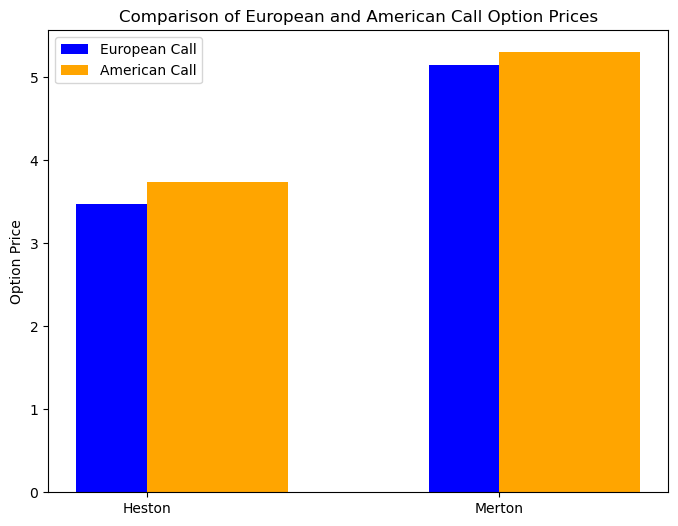

In [25]:
import matplotlib.pyplot as plt

# Data for visualization
models = ['Heston', 'Merton']
european_prices = [3.47, 5.15]
american_prices = [3.74, 5.30]

# Plotting the data
plt.figure(figsize=(8, 6))
x = range(len(models))
plt.bar(x, european_prices, width=0.4, label='European Call', color='blue', align='center')
plt.bar(x, american_prices, width=0.4, label='American Call', color='orange', align='edge')

plt.xticks(x, models)
plt.ylabel('Option Price')
plt.title('Comparison of European and American Call Option Prices')
plt.legend()
plt.show()


## Visualization: European vs. Up-and-In Call Prices

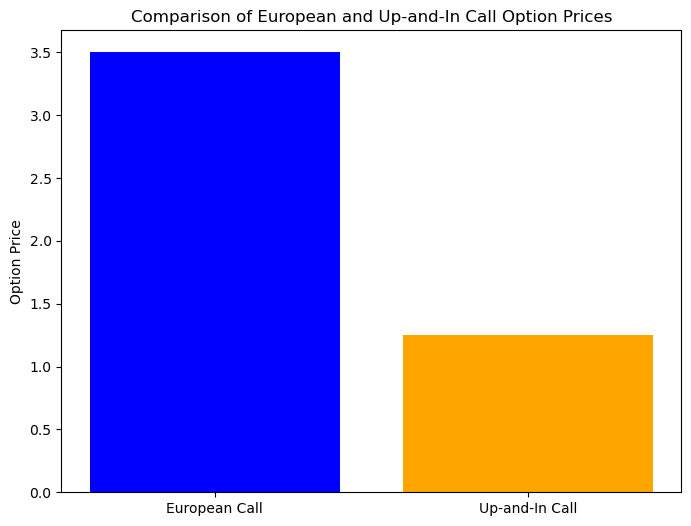

In [26]:
# Data for visualization
option_types = ['European Call', 'Up-and-In Call']
call_prices = [3.50, 1.25]

# Plotting the data
plt.figure(figsize=(8, 6))
plt.bar(option_types, call_prices, color=['blue', 'orange'])

plt.ylabel('Option Price')
plt.title('Comparison of European and Up-and-In Call Option Prices')
plt.show()


## Visualization: European vs. Down-and-In Put Prices

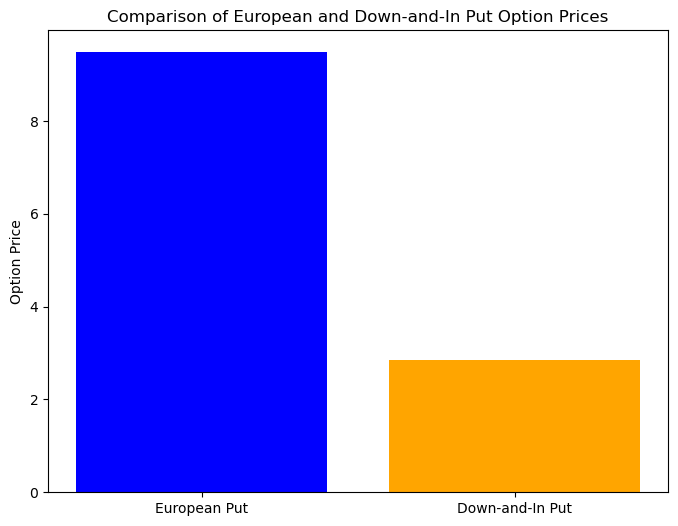

In [27]:
# Data for visualization
option_types = ['European Put', 'Down-and-In Put']
put_prices = [9.48, 2.85]

# Plotting the data
plt.figure(figsize=(8, 6))
plt.bar(option_types, put_prices, color=['blue', 'orange'])

plt.ylabel('Option Price')
plt.title('Comparison of European and Down-and-In Put Option Prices')
plt.show()
